# Project: Analysis of Airline Delay and Cancellation Data, 2009 - 2018

A 2010 report sponsored by the Federal Aviation Administration (FAA) analyzed a variety of cost components caused by flight delays. This included the cost to airlines, cost to passengers, cost of lost demand, as well as the indirect impact of delay on the US economy. The report concluded that the total cost of all US air transportation delays in 2007 was **$32.9 billion**. Clearly, flight delays are a serious and widespread problem in the US. An exploration of multi-year (2009 - 2018) airline delay and cancellation data will be made to determine the cause of airline delays.

The research question is, "Whether late aircraft delays are the biggest cause of flight delays?" 

For this project the null hypothesis is, "Late aircraft delay is not the biggest cause of flight delays."

Import required libraries:

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb
import scipy.stats as stats

# Magic word for producing visualizations in notebook.
%matplotlib inline

# Display all columns.
pd.set_option('display.max_columns', None)

## Loading the Data:

Airline Delay and Cancellation Data datasets were collected from www.kaggle.com. This data has been combined from multiple US Government (Bureau of Transportation Statistics) datasets. This department was founded in 1966 and its mandate was to collect and disseminate transportation statistics. It provides various publicly downloadable datasets.

Note that I will not use any restricted, private, or propriety data in this analysis.

These datasets will be cleansed and combined to form a multi-year dataset.

There are ten data files associated with this project:

- `2009.csv`: Airline Delay and Cancellation Data dataset for 2009.
- `2010.csv`: Airline Delay and Cancellation Data dataset for 2010.
- `2011.csv`: Airline Delay and Cancellation Data dataset for 2011.
- `2012.csv`: Airline Delay and Cancellation Data dataset for 2012.
- `2013.csv`: Airline Delay and Cancellation Data dataset for 2013.
- `2014.csv`: Airline Delay and Cancellation Data dataset for 2014.
- `2015.csv`: Airline Delay and Cancellation Data dataset for 2015.
- `2016.csv`: Airline Delay and Cancellation Data dataset for 2016.
- `2017.csv`: Airline Delay and Cancellation Data dataset for 2017.
- `2018.csv`: Airline Delay and Cancellation Data dataset for 2018.

### Load the datasets for 2009 to 2018:

Load each dataset from its corresponding data file:

In [2]:
# Load the 2009 dataset.
year_2009 = pd.read_csv('airline-data\\2009.csv', sep = ',')

# Load the 2010 dataset.
year_2010 = pd.read_csv('airline-data\\2010.csv', sep = ',')

# Load the 2011 dataset.
year_2011 = pd.read_csv('airline-data\\2011.csv', sep = ',')

# Load the 2012 dataset.
year_2012 = pd.read_csv('airline-data\\2012.csv', sep = ',')

# Load the 2013 dataset.
year_2013 = pd.read_csv('airline-data\\2013.csv', sep = ',')

# Load the 2014 dataset.
year_2014 = pd.read_csv('airline-data\\2014.csv', sep = ',')

# Load the 2015 dataset.
year_2015 = pd.read_csv('airline-data\\2015.csv', sep = ',')

# Load the 2016 dataset.
year_2016 = pd.read_csv('airline-data\\2016.csv', sep = ',')

# Load the 2017 dataset.
year_2017 = pd.read_csv('airline-data\\2017.csv', sep = ',')

# Load the 2018 dataset.
year_2018 = pd.read_csv('airline-data\\2018.csv', sep = ',')

Display the number of rows and columns in each dataset:

In [3]:
# Display the number of rows and columns in each dataset.
print("2009 dataset:", year_2009.shape)
print("2010 dataset:", year_2010.shape)
print("2011 dataset:", year_2011.shape)
print("2012 dataset:", year_2012.shape)
print("2013 dataset:", year_2013.shape)
print("2014 dataset:", year_2014.shape)
print("2015 dataset:", year_2015.shape)
print("2016 dataset:", year_2016.shape)
print("2017 dataset:", year_2017.shape)
print("2018 dataset:", year_2018.shape)

2009 dataset: (6429338, 28)
2010 dataset: (6450117, 28)
2011 dataset: (6066650, 28)
2012 dataset: (6096762, 28)
2013 dataset: (6369482, 28)
2014 dataset: (5819811, 28)
2015 dataset: (5819079, 28)
2016 dataset: (5617658, 28)
2017 dataset: (5674621, 28)
2018 dataset: (7213446, 28)


Display sample data from each dataset:

In [4]:
# Display a sample of the dataset.
year_2009.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Display a sample of the dataset.
year_2010.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2010-01-01,MQ,4438,LGA,RDU,1940,2101.0,81.0,14.0,2115.0,2225.0,22.0,2130,2247.0,77.0,0.0,NaN,0.0,110.0,106.0,70.0,431.0,0.0,0.0,0.0,0.0,77.0,NaN
1,2010-01-01,MQ,4440,DCA,JFK,950,949.0,-1.0,13.0,1002.0,1040.0,9.0,1100,1049.0,-11.0,0.0,NaN,0.0,70.0,60.0,38.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-01,MQ,4443,LGA,RDU,900,937.0,37.0,11.0,948.0,1105.0,3.0,1100,1108.0,8.0,0.0,NaN,0.0,120.0,91.0,77.0,431.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-01,MQ,4445,RDU,LGA,1940,1935.0,-5.0,12.0,1947.0,2051.0,4.0,2120,2055.0,-25.0,0.0,NaN,0.0,100.0,80.0,64.0,431.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-01,MQ,4447,JFK,DCA,2035,2236.0,121.0,18.0,2254.0,2341.0,1.0,2200,2342.0,102.0,0.0,NaN,0.0,85.0,66.0,47.0,213.0,0.0,0.0,0.0,0.0,102.0,NaN


In [6]:
# Display a sample of the dataset.
year_2011.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2011-01-01,MQ,4529,BOS,JFK,1830,1823.0,-7.0,68.0,1931.0,2019.0,30.0,2000,2049.0,49.0,0.0,NaN,0.0,90.0,146.0,48.0,187.0,0.0,0.0,49.0,0.0,0.0,NaN
1,2011-01-01,MQ,4532,BNA,DCA,1100,1052.0,-8.0,11.0,1103.0,1317.0,3.0,1335,1320.0,-15.0,0.0,NaN,0.0,95.0,88.0,74.0,562.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-01,MQ,4532,DCA,JFK,1400,1358.0,-2.0,9.0,1407.0,1507.0,4.0,1519,1511.0,-8.0,0.0,NaN,0.0,79.0,73.0,60.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-01,MQ,4537,RDU,JFK,1710,1706.0,-4.0,59.0,1805.0,1930.0,15.0,1855,1945.0,50.0,0.0,NaN,0.0,105.0,159.0,85.0,426.0,0.0,0.0,50.0,0.0,0.0,NaN
4,2011-01-01,MQ,4540,CMH,LGA,1340,1340.0,0.0,14.0,1354.0,1511.0,4.0,1525,1515.0,-10.0,0.0,NaN,0.0,105.0,95.0,77.0,478.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Display a sample of the dataset.
year_2012.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2012-01-01,MQ,4041,BMI,ORD,1715.0,1702.0,-13.0,9.0,1711.0,1748.0,9.0,1810.0,1757.0,-13.0,0.0,NaN,0.0,55.0,55.0,37.0,116.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-01,MQ,4041,ORD,BMI,1545.0,1540.0,-5.0,11.0,1551.0,1614.0,5.0,1635.0,1619.0,-16.0,0.0,NaN,0.0,50.0,39.0,23.0,116.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-01,MQ,4042,SGF,ORD,715.0,705.0,-10.0,12.0,717.0,832.0,18.0,910.0,850.0,-20.0,0.0,NaN,0.0,115.0,105.0,75.0,438.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-01,MQ,4045,ORD,DBQ,1535.0,1529.0,-6.0,13.0,1542.0,1613.0,2.0,1630.0,1615.0,-15.0,0.0,NaN,0.0,55.0,46.0,31.0,147.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-01,MQ,4047,ORD,RIC,1600.0,1615.0,15.0,12.0,1627.0,1853.0,11.0,1855.0,1904.0,9.0,0.0,NaN,0.0,115.0,109.0,86.0,642.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Display a sample of the dataset.
year_2013.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2013-01-01,VX,108,LAX,IAD,700,700.0,0.0,8.0,708.0,1411.0,7.0,1445,1418.0,-27.0,0.0,NaN,0.0,285.0,258.0,243.0,2288.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,VX,114,LAX,IAD,2205,2204.0,-1.0,12.0,2216.0,523.0,13.0,545,536.0,-9.0,0.0,NaN,0.0,280.0,272.0,247.0,2288.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,VX,11,JFK,SFO,730,729.0,-1.0,18.0,747.0,1043.0,6.0,1115,1049.0,-26.0,0.0,NaN,0.0,405.0,380.0,356.0,2586.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,VX,121,PHL,LAX,700,700.0,0.0,14.0,714.0,1006.0,8.0,1000,1014.0,14.0,0.0,NaN,0.0,360.0,374.0,352.0,2402.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,VX,124,LAX,PHL,1100,1104.0,4.0,12.0,1116.0,1828.0,9.0,1915,1837.0,-38.0,0.0,NaN,0.0,315.0,273.0,252.0,2402.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Display a sample of the dataset.
year_2014.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2014-01-01,AA,2377,ICT,DFW,1135,1144.0,9.0,12.0,1156.0,1253.0,9.0,1300,1302.0,2.0,0.0,NaN,0.0,85.0,78.0,57.0,328.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01,AA,2378,MIA,TPA,2225,2220.0,-5.0,14.0,2234.0,2311.0,4.0,2325,2315.0,-10.0,0.0,NaN,0.0,60.0,55.0,37.0,204.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-01,EV,2500,DFW,HOU,2105,NaN,NaN,NaN,NaN,NaN,NaN,2205,NaN,NaN,1.0,A,0.0,60.0,NaN,NaN,247.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-01,EV,2502,CRW,DFW,1655,1805.0,70.0,6.0,1811.0,1941.0,24.0,1900,2005.0,65.0,0.0,NaN,0.0,185.0,180.0,150.0,946.0,0.0,0.0,0.0,0.0,65.0,NaN
4,2014-01-01,EV,2502,DFW,CRW,1320,1440.0,80.0,9.0,1449.0,1730.0,5.0,1625,1735.0,70.0,0.0,NaN,0.0,125.0,115.0,101.0,946.0,6.0,0.0,0.0,0.0,64.0,NaN


In [10]:
# Display a sample of the dataset.
year_2015.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,2238.0,7.0,2250,2245.0,-5.0,0.0,NaN,0.0,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,1354.0,9.0,1404,1403.0,-1.0,0.0,NaN,0.0,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,NaN,0.0,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,2343.0,4.0,2356,2347.0,-9.0,0.0,NaN,0.0,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,830.0,10.0,855,840.0,-15.0,0.0,NaN,0.0,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Display a sample of the dataset.
year_2016.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,NaN,0.0,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,NaN,0.0,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,DL,1254,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,NaN,0.0,245.0,231.0,207.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,DL,1255,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,NaN,0.0,213.0,193.0,173.0,1590.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,DL,1256,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,NaN,0.0,136.0,188.0,121.0,874.0,72.0,0.0,52.0,0.0,0.0,NaN


In [12]:
# Display a sample of the dataset.
year_2017.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,1143.0,26.0,1142,1209.0,27.0,0.0,NaN,0.0,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,1757.0,12.0,1727,1809.0,42.0,0.0,NaN,0.0,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,2025.0,15.0,1958,2040.0,42.0,0.0,NaN,0.0,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,NaN
3,2017-01-01,AA,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,1744.0,5.0,1612,1749.0,97.0,0.0,NaN,0.0,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,NaN
4,2017-01-01,AA,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,631.0,11.0,600,642.0,42.0,0.0,NaN,0.0,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,NaN


In [13]:
# Display a sample of the dataset.
year_2018.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


### Create the main dataset that holds the 2009 to 2018 data:

Concatenate the datasets to form a new dataset:

In [14]:
# Concatenate the datasets to form a single dataset.
all_years = [year_2009, year_2010, year_2011, year_2012, year_2013,
             year_2014, year_2015, year_2016, year_2017, year_2018]
flights = pd.concat(all_years)

Show the number of rows and columns of the new dataset:

In [15]:
# Display the rows and columns in the dataset.
print("flights rows x columns:", flights.shape)

flights rows x columns: (61556964, 28)


Show sample data from the new dataset:

In [16]:
# Show sample data for this dataset.
flights.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100.0,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202.0,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510.0,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632.0,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100.0,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210.0,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240.0,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357.0,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715.0,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900.0,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN


Display the dataset structure:

In [17]:
# Display the dataset structure.
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61556964 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         float64
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         float64
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 2

## Cleansing the Dataset:

The combined dataset has a number of issues that require fixing.

### Determine the pattern of NaNs in the dataset:

Find all columns that contain NaNs:

In [18]:
# Find all columns containing NaN values.
columns_with_nans = flights.loc[:, flights.isnull().any()].columns
print(columns_with_nans)

Index(['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLATION_CODE', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 27'],
      dtype='object')


Define a function to calculate the percentage of NaNs in each column:

In [19]:
# Function to calculate the percentage of NaN values in each column.
def nan_percentage(df):
    return df.isna().sum()/(len(df)) * 100

Show the percentage of NaNs in each column:

In [20]:
# Display the percentage of NaNs in each column.
print(nan_percentage(flights))

FL_DATE                  0.000000
OP_CARRIER               0.000000
OP_CARRIER_FL_NUM        0.000000
ORIGIN                   0.000000
DEST                     0.000000
CRS_DEP_TIME             0.000002
DEP_TIME                 1.520093
DEP_DELAY                1.528137
TAXI_OUT                 1.565868
WHEELS_OFF               1.565860
WHEELS_ON                1.619664
TAXI_IN                  1.619662
CRS_ARR_TIME             0.000003
ARR_TIME                 1.619662
ARR_DELAY                1.821648
CANCELLED                0.000000
CANCELLATION_CODE       98.419011
DIVERTED                 0.000000
CRS_ELAPSED_TIME         0.000097
ACTUAL_ELAPSED_TIME      1.817429
AIR_TIME                 1.817427
DISTANCE                 0.000000
CARRIER_DELAY           81.495611
WEATHER_DELAY           81.495611
NAS_DELAY               81.495611
SECURITY_DELAY          81.495611
LATE_AIRCRAFT_DELAY     81.495611
Unnamed: 27            100.000000
dtype: float64


The `Unnamed: 27` column contains only NaNs which will be dropped from dataset.

Since cancelled and diverted flights are not delayed flights for the purposes of this data analysis, cancelled and diverted flights will be removed from the dataset.

The `CARRIER_DELAY`, `WEATHER_DELAY`, `NAS_DELAY`, `SECURITY_DELAY`, and `LATE_AIRCRAFT_DELAY` columns contain NaNs which mean no delay, i.e. a delay of zero minutes, which is why they will be replaced with zeroes in these columns.

After examining the dataset and looking at the percentage of columns containing NaNs, those columns with a low percentage (less than two percent) of NaNs correspond to rows that have missing data. These rows will be removed from the dataset.

### Remove column(s) only containing NaNs:

The `Unnamed: 27` column will be dropped from the dataset and the number of rows and columns will be displayed to show that the column has been removed:

In [21]:
# Remove 'Unnamed: 27' column since it is all NaNs.
flights.drop(['Unnamed: 27'], axis = 1, inplace = True)

# Show row and column count.
print("flights rows x columns:", flights.shape)

flights rows x columns: (61556964, 27)


Show a sample of the dataset that shows `Unnamed: 27` is gone:

In [22]:
# Show a sample of the dataset without the 'Unnamed: 27' column.
flights.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2009-01-01,XE,1204,DCA,EWR,1100.0,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202.0,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510.0,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632.0,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100.0,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210.0,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240.0,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357.0,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715.0,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900.0,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN


### Remove cancelled and diverted flights from the dataset:

Cancelled and diverted flights will be removed from the dataset as they are not delayed flights. The `CANCELLED` column contains one of two values: 0 - not cancelled; 1 - cancelled. The `CANCELLATION` column contains a reason code for a cancelled flight: A - carrier; B - weather; C - NAS; D - security. The `CANCELLED` and `CANCELLATION_CODE` columns will be removed from the dataset since they are now extraneous. The `DIVERTED` column contains one of two values: 0 - not diverted; 1 - diverted. The `DIVERTED` column will be removed from the dataset since it is now extraneous.

Remove the cancelled and diverted flights from the main dataset:

In [23]:
# Cancelled and diverted flights are removed from the main dataset.

# Show the number of rows and columns before the cancelled and diverted flights are removed.
print("Before removing cancelled and diverted flights:", flights.shape)

# Remove cancelled flights.
flights = flights[(flights['CANCELLED'] == 0)]
print("After removing cancelled flights:", flights.shape)

# Remove diverted flights.
flights = flights[(flights['DIVERTED'] == 0)]
print("After removing diverted flights:", flights.shape)

# Show the number of rows and columns after all cancelled and diverted flights are removed from the main dataset.
print("After removing cancelled and diverted flights:", flights.shape)

Before removing cancelled and diverted flights: (61556964, 27)
After removing cancelled flights: (60583755, 27)
After removing diverted flights: (60438213, 27)
After removing cancelled and diverted flights: (60438213, 27)


The `CANCELLED`, `CANCELLATION_CODE` and `DIVERTED` columns are removed from the main dataset, since they are not needed, and the number of rows and columns in the main dataset are displayed:

In [24]:
# Remove CANCELLED, CANCELLATION_CODE and DIVERTED columns from the dataset.
flights.drop(['CANCELLED', 'CANCELLATION_CODE', 'DIVERTED'], axis = 1, inplace = True)

# Show the number of rows and columns after the columns have been removed.
print("Remaining rows x columns:", flights.shape)

Remaining rows x columns: (60438213, 24)


### Replace NaNs with zeroes in the final five delay columns:

NaNs are replaced with zero in the `CARRIER_DELAY`, `WEATHER_DELAY`, `NAS_DELAY`, `SECURITY_DELAY` and `LATE_AIRCRAFT_DELAY` columns as these NaNs mean no delay, i.e. zero minutes. The number of rows and columns in the main dataset will be displayed to show that no rows or columns are removed:

In [25]:
# Replace NaNs with zeroes in final five DELAY columns.
flights["CARRIER_DELAY"] = flights["CARRIER_DELAY"].fillna(0)
flights["WEATHER_DELAY"] = flights["WEATHER_DELAY"].fillna(0)
flights["NAS_DELAY"] = flights["NAS_DELAY"].fillna(0)
flights["SECURITY_DELAY"] = flights["SECURITY_DELAY"].fillna(0)
flights["LATE_AIRCRAFT_DELAY"] = flights["LATE_AIRCRAFT_DELAY"].fillna(0)

# Display rows and columns after the replacement to show no rows or columns have been removed.
print("flights rows x columns:", flights.shape)

flights rows x columns: (60438213, 24)


### Remove rows corresponding columns with less than two percent of NaNs:

All the rows that contain NaNs in the `CRS_DEP_TIME`, `DEP_DELAY`, `WHEELS_ON`, `CRS_ARR_TIME`, `ARR_TIME`, `CRS_ELAPSED_TIME`, `ACTUAL_ELAPSED_TIME` and `AIR_TIME` columns will be removed from the dataset. A row and column count will be displayed to show the final row count:

In [26]:
# Remove rows that contain NaNs.
flights.dropna(subset = ['ARR_DELAY',
                         'CRS_DEP_TIME',
                         'DEP_DELAY',
                         'WHEELS_ON',
                         'CRS_ARR_TIME',
                         'CRS_ELAPSED_TIME',
                         'ACTUAL_ELAPSED_TIME',
                         'AIR_TIME'
                        ], inplace = True)

# Display the rows amd columns after the NaNs rows are removed.
print("flights rows x columns:", flights.shape)

flights rows x columns: (60431020, 24)


All of the rows with NaNs were removed. This can be verified by calculating the percentage of NaN values in each column again using the previously defined function:

In [27]:
# Show percentage of NaN values in each column.
print(nan_percentage(flights))

FL_DATE                0.0
OP_CARRIER             0.0
OP_CARRIER_FL_NUM      0.0
ORIGIN                 0.0
DEST                   0.0
CRS_DEP_TIME           0.0
DEP_TIME               0.0
DEP_DELAY              0.0
TAXI_OUT               0.0
WHEELS_OFF             0.0
WHEELS_ON              0.0
TAXI_IN                0.0
CRS_ARR_TIME           0.0
ARR_TIME               0.0
ARR_DELAY              0.0
CRS_ELAPSED_TIME       0.0
ACTUAL_ELAPSED_TIME    0.0
AIR_TIME               0.0
DISTANCE               0.0
CARRIER_DELAY          0.0
WEATHER_DELAY          0.0
NAS_DELAY              0.0
SECURITY_DELAY         0.0
LATE_AIRCRAFT_DELAY    0.0
dtype: float64


There are no more NaNs left in the dataset.

### Make the dataset more readable:

The dataset will be made easier to read.  The IATA codes will be replaced with the corresponding airline business names. This website provided the airline names: https://www.iata.org/en/publications/directories/code-search/.

A list of all unique IATA codes in the dataset will be generated:

In [28]:
# Show all the unique IATA codes in the dataset.
flights.OP_CARRIER.unique()

array(['XE', 'YV', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'EV', 'F9', 'FL',
       'HA', 'MQ', '9E', 'AA', 'AS', 'B6', 'CO', 'DL', 'VX', 'NK', 'G4',
       'YX'], dtype=object)

The IATA codes will be replaced with the airline business name:

In [29]:
# Replace the IATA codes with the airline business name.
flights['OP_CARRIER'].replace({
    '9E': 'Endeavor Air',
    'AA': 'American Airlines Inc.',
    'AS': 'Alaska Airlines Inc.',
    'B6': 'JetBlue Airways Corporation',
    'CO': 'Continental Airlines',
    'DL': 'Delta Air Lines Inc.',
    'EV': 'ExpressJet Airlines, Inc.',
    'F9': 'Frontier Airlines, Inc.',
    'FL': 'AirTran Airways',
    'G4': 'Allegiant Air LLC',
    'HA': 'Hawaiian Airlines, Inc.',
    'MQ': 'Envoy Air Inc.',
    'NK': 'Spirit Airlines',
    'NW': 'Northwest Airlines',
    'OH': 'PSA Airlines, Inc.',
    'OO': 'SkyWest Airlines',
    'UA': 'United Airlines Inc.',
    'US': 'US Airways',
    'VX': 'Virgin America',
    'WN': 'Southwest Airlines Co.',
    'YV': 'Mesa Airlines, Inc.',
    'YX': 'Republic Airways Inc',
    'XE': 'JSX Air'
}, inplace = True)

Confirm that no IATA codes were left in the dataset:

In [30]:
# Confirm that all IATA codes have been replaced with airline business names.
flights.OP_CARRIER.unique()

array(['JSX Air', 'Mesa Airlines, Inc.', 'Northwest Airlines',
       'PSA Airlines, Inc.', 'SkyWest Airlines', 'United Airlines Inc.',
       'US Airways', 'Southwest Airlines Co.',
       'ExpressJet Airlines, Inc.', 'Frontier Airlines, Inc.',
       'AirTran Airways', 'Hawaiian Airlines, Inc.', 'Envoy Air Inc.',
       'Endeavor Air', 'American Airlines Inc.', 'Alaska Airlines Inc.',
       'JetBlue Airways Corporation', 'Continental Airlines',
       'Delta Air Lines Inc.', 'Virgin America', 'Spirit Airlines',
       'Allegiant Air LLC', 'Republic Airways Inc'], dtype=object)

### Remove non-delayed flights from the dataset:

The `ARR_DELAY` and `DEP_DELAY` columns show positive numbers, representing minutes of delay, if a flight was delayed.

A delayed flight is a flight that arrives late at its destination. However, since a flight that was delayed on departure could still arrive on time, then only `ARR_DELAY` times that are positive are actual delayed flights.

Non-delayed flights will be removed from the main dataset as they are not part of the analysis and the number of rows and columns left in the dataset will be displayed:

In [31]:
# Remove non-delayed flights from the dataset.
flights = flights[(flights['ARR_DELAY'] > 0)]

# Show the rows and columns for the dataset.
print("flights rows x columns:", flights.shape)

flights rows x columns: (22562655, 24)


Show the structure of the cleansed dataset:

In [32]:
# Show the structure of the cleansed dataset.
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22562655 entries, 0 to 7213444
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         float64
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         float64
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CRS_ELAPSED_TIME     float64
 16  ACTUAL_ELAPSED_TIME  float64
 17  AIR_TIME             float64
 18  DISTANCE             float64
 19  CARRIER_DELAY        float64
 20  WEATHER_DELAY        float64
 21  NAS_DELAY            float64
 22  SECURITY_DELAY       float64
 23  LATE_AIRCRAFT_DELAY  float64
dt

### Convert the `FL_DATE` column to the DateTime type:

The `FL_DATE` column is not a DateTime type. It will be converted to that type to allow for future analysis:

In [33]:
# Convert to a DateTime type.
flights['FL_DATE'] = pd.to_datetime(flights['FL_DATE'])

Show the new structure of the dataset. The type of the `FL_DATE` column is now DateTime:

In [34]:
# Show the structure of the dataset.
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22562655 entries, 0 to 7213444
Data columns (total 24 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         float64       
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         float64       
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CRS_ELAPSED_TIME     float64       
 16  ACTUAL_ELAPSED_TIME  float64       
 17  AIR_TIME             float64       
 18  DISTANCE             float64       
 19  CARRIER_DELAY       

## Dataset Analysis:

Show any correlation between the remaining rows of the dataset by calculating the Pearson correlation coefficient.

A function will be defined to display this correlation:

In [35]:
# Function to show the Pearson correlation coefficients.
def show_pearson_correlation(df):
    
    # Display a correlation matrix between the rows of the dataset.
    correlation_matrix = df.corr()

    # Generate a mask for the upper triangle of the correlation matrix.
    mask_upper_triangle = np.triu(np.ones_like(correlation_matrix, dtype = bool))

    # Create a heatmap plot to visualize the correlation coefficients.
    plot.figure(figsize = (16, 9))
    heatmap = sb.heatmap(correlation_matrix, mask = mask_upper_triangle, vmin = -1, vmax = 1,
                         annot = True, fmt = '.2f', cmap = 'BrBG')
    heatmap.set_title('Correlation Matrix:', fontdict = {'fontsize': 18}, pad = 12)

    # Display the correlation matrix heatmap plot.
    plot.show()

Show any correlation between the remaining rows of the dataset:

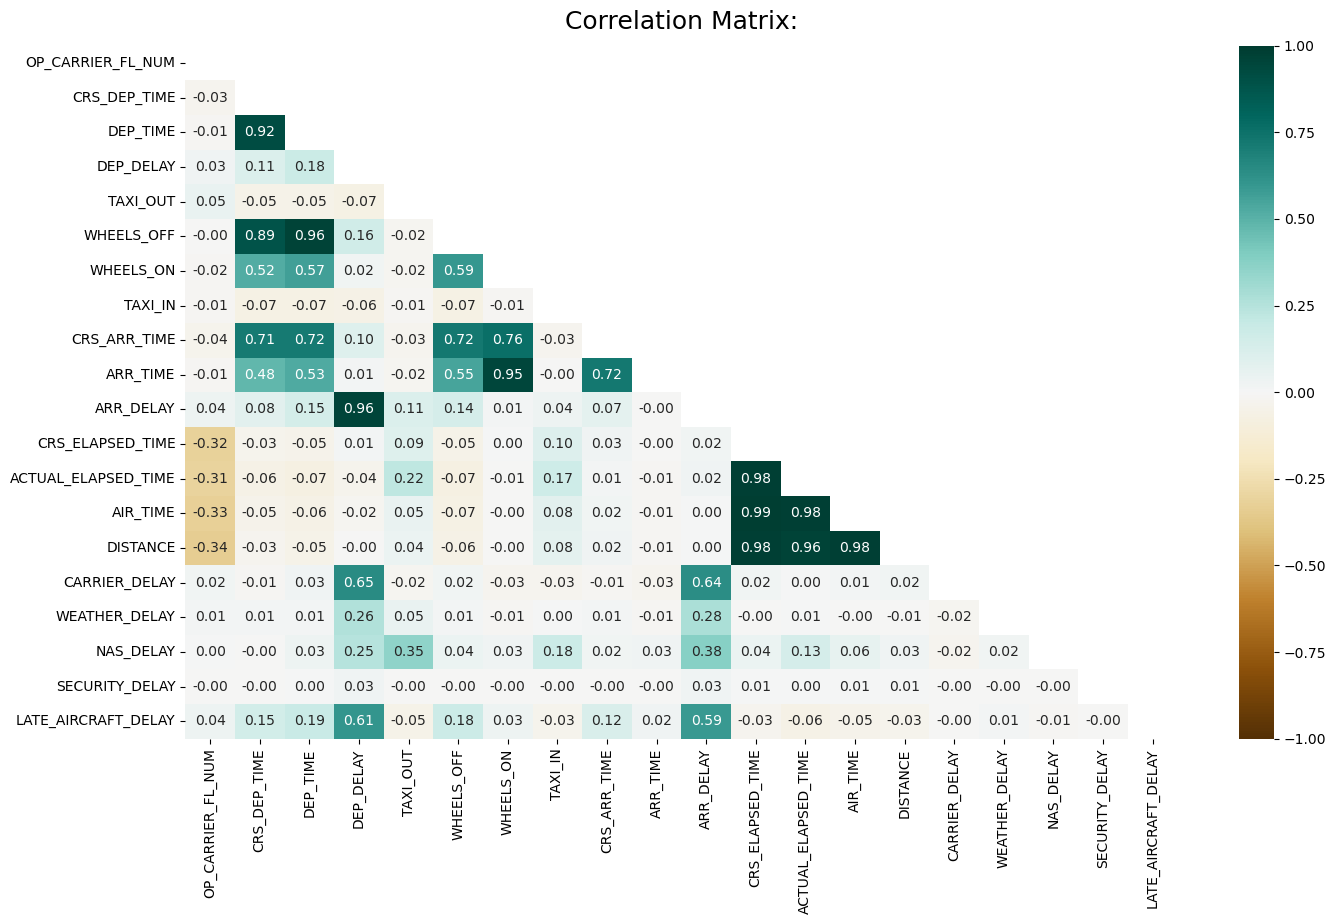

In [36]:
# Display a correlation matrix.
show_pearson_correlation(flights)

There are a number of correlations (greater than 0.8) that stand out in the heatmap. These are variables that will naturally have a high correlation. For example, `DISTANCE` and `AIR_TIME`, will always be correlated since the time in the air increases with the distance flown. This kind of linear predictability is called multicollinearity.  There are also a number of variables, `TAXI_IN`, `TAXI_OUT` and `CRS_ARR_TIME`, that have a smaller correlation, but are still multicollinear. These variables will be removed for the purposes of this analysis:

In [37]:
# Remove the multicollinear columns.
flights.drop(['DEP_TIME', 'WHEELS_OFF', 'CRS_DEP_TIME', 'WHEELS_ON', 'ARR_TIME',
              'DEP_DELAY', 'ACTUAL_ELAPSED_TIME', 'CRS_ELAPSED_TIME', 'AIR_TIME',
              'DISTANCE', 'TAXI_IN', 'TAXI_OUT', 'CRS_ARR_TIME'], axis = 1, inplace = True)

# Display the structure of the dataset to show that these columns were removed.
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22562655 entries, 0 to 7213444
Data columns (total 11 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   ARR_DELAY            float64       
 6   CARRIER_DELAY        float64       
 7   WEATHER_DELAY        float64       
 8   NAS_DELAY            float64       
 9   SECURITY_DELAY       float64       
 10  LATE_AIRCRAFT_DELAY  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 2.0+ GB


Repeat the Pearson correlation:

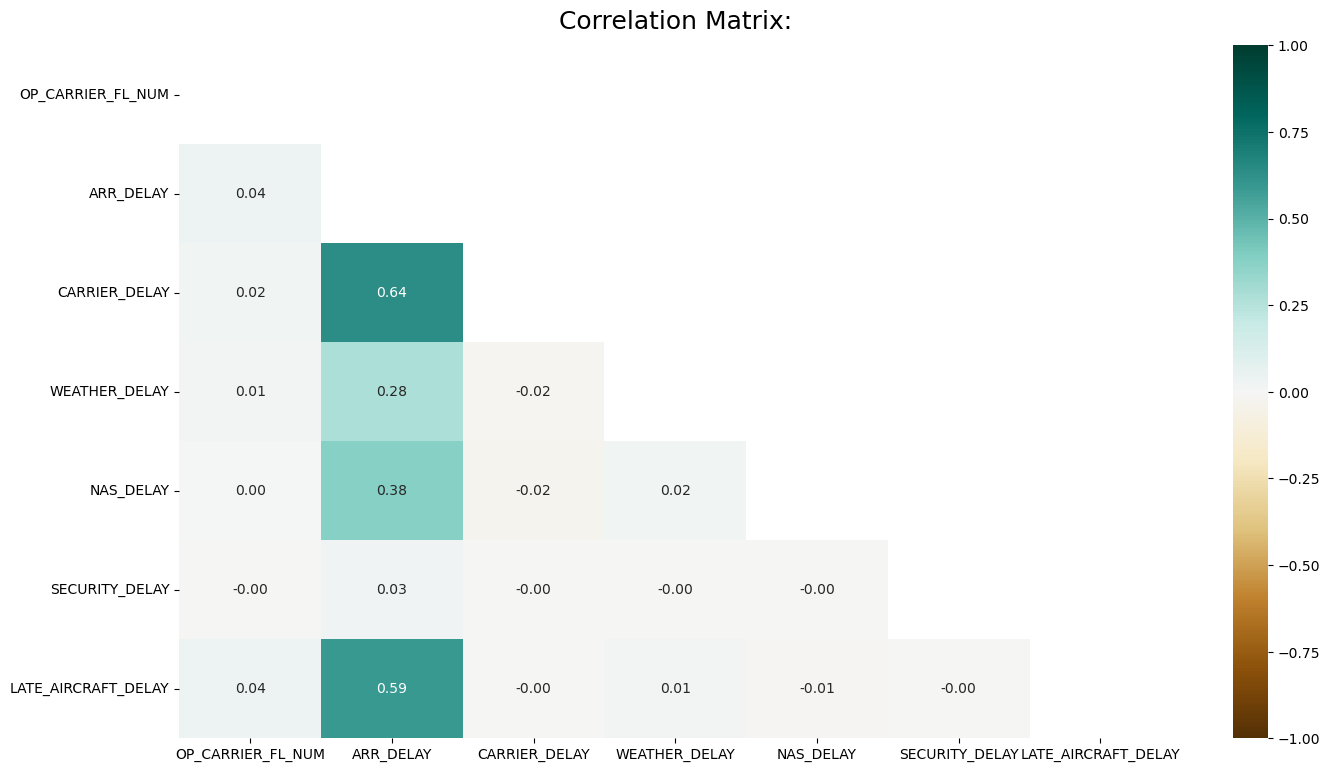

In [38]:
# Display the correlation matrix heatmap.
show_pearson_correlation(flights)

It can be seen that `CARRIER_DELAY`, `WEATHER_DELAY`, `NAS_DELAY` and `LATE_AIRCRAFT_DELAY` have a weak to strong correlation with `ARR_DELAY`, and that `SECURITY_DELAY` has a very weak correlation with `ARR_DELAY`. `SECURITY_DELAY` will be discounted as a cause of flight delays due to its very weak correlation.

The remaining delays types will be tested for statistical significance, and their computed p-values displayed:

In [39]:
# Compute statistical significance and show Pearson correlation coefficient and p-value.
delays = ['CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY', 'WEATHER_DELAY']
for delay in delays:
    coefficient, p_value = stats.pearsonr(flights['ARR_DELAY'], flights[delay])
    if delay == 'LATE_AIRCRAFT_DELAY':
        padding = '\t'
    else:
        padding = '\t\t'
    print(delay, padding, "Coefficient:", coefficient, "\tp-value:", p_value)

CARRIER_DELAY 		 Coefficient: 0.6391328074730628 	p-value: 0.0
LATE_AIRCRAFT_DELAY 	 Coefficient: 0.5861724849392254 	p-value: 0.0
NAS_DELAY 		 Coefficient: 0.3815639128031938 	p-value: 0.0
WEATHER_DELAY 		 Coefficient: 0.2761058444814288 	p-value: 0.0


This shows that the p-value is less than 0.05 for each type of delay, so the correlation between the `ARR_DELAY` and each delay type is statistically significant.

Although the `CARRIER_DELAY` has a bigger coefficient than `LATE_AIRCRAFT_DELAY`, this does not mean that the number of delays caused by it is larger.

The delay types will be displayed in a plot to visualize the total number of delays during the dataset's time period (2009 - 2018):

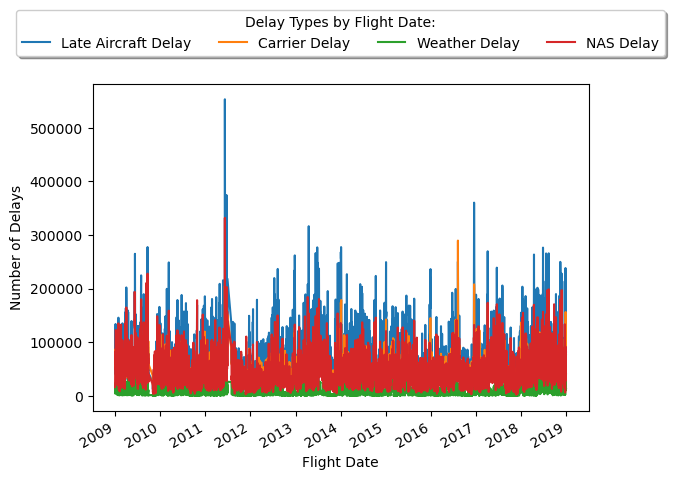

In [40]:
# Produce a plot based on the correlated DELAY variables by flight date.
# Create a dataset that contain only the correlated DELAY columns and the FL_DATE column.
flights_subset = flights.filter(['FL_DATE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'LATE_AIRCRAFT_DELAY'], axis = 1)

# Group by those variables set up the plot options.
flights_subset = flights_subset.groupby('FL_DATE')[['LATE_AIRCRAFT_DELAY', 'CARRIER_DELAY',
                                                   'WEATHER_DELAY', 'NAS_DELAY']].sum().plot()
flights_subset.legend(['Late Aircraft Delay', 'Carrier Delay', 'Weather Delay', 'NAS Delay'],
                      loc = 'upper center', title = 'Delay Types by Flight Date:', bbox_to_anchor = (0.5, 1.25),
                      ncol = 5, fancybox = True, shadow = True)
plot.xlabel('Flight Date')
plot.ylabel('Number of Delays')

# Display the plot.
plot.show()

It can be seen that `LATE_AIRCRAFT_DELAY` causes a much greater number of delays than the other delay types. `CARRIER_DELAY` is the second greatest delay type, followed by `NAS_DELAY`. `WEATHER_DELAY` is responsible for a much smaller number of delays.

## Conclusion:

It can be concluded that the biggest cause of flight delays are late aircraft delays, followed by carrier delays. NAS delays also contribute to flight delays, but to a lesser extent.

The implications of this analysis are that the two biggest causes of flight delays are within the control of the airlines.

Late aircraft delay is when an aircraft is late to an airport due to its late arrival at a previous airport. The ripple effect of an earlier delay at previous airports is referred to as delay propagation.

Carrier delay is a delay caused by one or more carrier tasks that do not complete on time.  For example, aircraft cleaning, fueling, maintenance, and cargo loading.

Two recommended courses of action based on these findings are:

- Airlines should allow aircraft to increase speed in order to eliminate or reduce the late aircraft delay.
- Airlines should do their best to reduce carrier delay, e.g., calculate the optimal number of cleaning staff needed to clean an aircraft quickly.